# Calculation of intrinsic and total efficiencies for circular side of the detector

## Geometrical efficiency calculated from the previous part

In [1]:
import math
import numpy
from matplotlib import pyplot as plt
import pandas as pd
R=2.54
t=0.03
y=1
z=0
x_positions=[]
geo_eff_cir=[]
for i in numpy.arange(-2, 2.2, 0.2): 
    x_positions.append(i)
    geo_eff=0.5*(1-math.cos(numpy.arctan((R+t)/y)))*(y/math.sqrt(i*i + y*y + z*z))
    geo_eff_cir.append(geo_eff) 
print(geo_eff_cir)



with open("cir_geo_twoin.csv", "w") as out_file:
     for number in geo_eff_cir:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_geo_twoin.csv",names=['Calculation'])
data.to_csv("cir_geo_twoinupdated.csv")


for number in geo_eff_cir:
    print(number)

plt.scatter(x_positions,geo_eff_cir, color="none", edgecolor="red", label="Experimental")
plt.xlabel('Radial position x (cm)')
plt.ylabel('Geometrical efficiency (%)')
plt.savefig("cirtwo_geo.pdf",bbox_inches='tight')
plt.show()

[0.1425222220793747, 0.1547692431204856, 0.16890503193338965, 0.18523443777159376, 0.20401996741340292, 0.22534741947958156, 0.2488545943015879, 0.27327388616902515, 0.2958956580600741, 0.3125006445104323, 0.3186893768738033, 0.31250064451043236, 0.2958956580600742, 0.27327388616902526, 0.24885459430158804, 0.22534741947958167, 0.20401996741340298, 0.18523443777159385, 0.16890503193338974, 0.15476924312048568, 0.14252222207937476]
0.1425222220793747
0.1547692431204856
0.16890503193338965
0.18523443777159376
0.20401996741340292
0.22534741947958156
0.2488545943015879
0.27327388616902515
0.2958956580600741
0.3125006445104323
0.3186893768738033
0.31250064451043236
0.2958956580600742
0.27327388616902526
0.24885459430158804
0.22534741947958167
0.20401996741340298
0.18523443777159385
0.16890503193338974
0.15476924312048568
0.14252222207937476
0.1425222220793747
0.1547692431204856
0.16890503193338965
0.18523443777159376
0.20401996741340292
0.22534741947958156
0.2488545943015879
0.2732738861690

<Figure size 640x480 with 1 Axes>

## Calculation of the survival probability of photon inside the cover layer (similar to the cylindrical side)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.29529529625340595
0.28599897237633426
0.27818556633666536
0.27170263055085275
0.2664031643897099
0.26215345093642395
0.2588373945078678
0.2563587596553352
0.2546422400266302
0.2536339136144985
0.25330140281448854
0.2536339136144985
0.2546422400266303
0.2563587596553351
0.2588373945078676
0.262153450936424
0.2664031643897097
0.2717026305508528
0.27818556633666536
0.28599897237633426
0.295295296253406


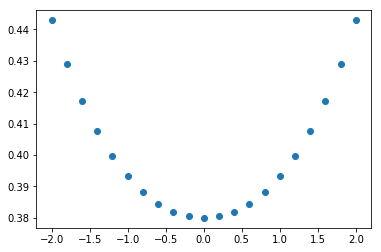

In [2]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=2.54
t=0.03
h=5.1
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-2, 2.2, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)
integral_survive=[x*1.5 for x in integral_survive]

plt.plot(y_positions,integral_survive, 'o')
plt.show()

## Calculation of interaction probability of the photon with crystal 

In [3]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.03
h=5.1
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-2, 2.2, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


358.1035682864592
329.7499779561736
304.15979817586384
281.4215663210402
261.60758249315757
244.7729689756285
230.95767571691178
220.18944779834646
212.4867143008065
207.86095168125883
206.31837688857624
207.860951681259
212.48671430080657
220.18944779834644
230.95767571691152
244.77296897562854
261.6075824931573
281.4215663210402
304.15979817586384
329.7499779561736
358.1035682864593


## Calculation of the intrinsic detection efficiency of the detecor for the circular side of that

-----------------------------
Thease are the products
158.61944892982766
141.4622322548768
126.91929856859778
114.69446979475183
104.53963170677888
96.25211776937286
89.67072453623774
84.67124059016594
81.16213935818396
79.08087999382776
78.39110143842707
79.08087999382784
81.16213935818399
84.67124059016587
89.67072453623757
96.2521177693729
104.53963170677868
114.69446979475187
126.91929856859778
141.4622322548768
158.6194489298277
THIS IS COEFFICIENT1
[0.482885, 0.5337810000000001, 0.602176, 0.629336, 0.658145, 0.692677, 0.7606, 0.8217, 0.8957, 0.9669]
These are the elements of products: 
76.59495259647983
75.5098517952404
76.42775553484394
72.18135884274993
68.80223590965798
66.67162818013588
68.20355308226243
69.57435839293935
72.69692822312538
76.46330286603207
78.39110143842707
76.46330286603214
72.69692822312541
69.57435839293929
68.2035530822623
66.67162818013591
68.80223590965785
72.18135884274996
76.42775553484394
75.5098517952404
76.59495259647986
This is the end of the ele

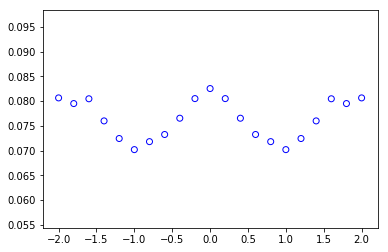

In [4]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   


First_sublist=products[0:10]
Second_sublist=products[11:21]

Coefficient1=[0.5681*0.85, 0.59309*0.9, 0.6208*0.97, 0.6488*0.97, 0.6785*0.97, 0.7141*0.97, 0.7606, 0.8217, 0.8957, 0.9669]
Coefficient1 = [x * 1 for x in Coefficient1]
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)


print("THIS IS COEFFICIENT1")
print(Coefficient1)


for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*1 for i in products[10:11]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)
    



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 


intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(i/950)
    
with open("cir_intr_twoin.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_intr_twoin.csv",names=['Calculation'])
data.to_csv("cir_intr_twoinupdated.csv")

    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
#plt.xlim(-1.9,1.9)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("cirtwo_intr.pdf", bbox_inches='tight')
plt.show()

## Calculation of the absolute detection efficiency of the detector for the circular side of the detector

0.011491034572752292
0.01230168695840989
0.01358845525180012
0.014074182550343622
0.014775820977113349
0.01581503090831134
0.017866071086540244
0.020013531890268492
0.02264284780581859
0.025152454133717268
0.02629727502090887
0.0251524541337173
0.022642847805818603
0.02001353189026848
0.017866071086540224
0.015815030908311354
0.014775820977113325
0.014074182550343635
0.013588455251800127
0.012301686958409897
0.0114910345727523


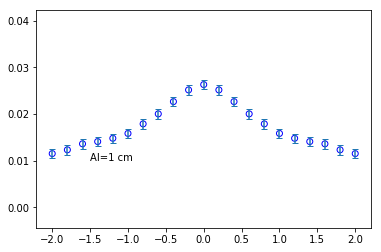

In [5]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.03
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geo_eff_cir,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 

with open("cir_total_twoin.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_total_twoin.csv",names=['Calculation'])
data.to_csv("cir_total_twoinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.text(-1.5, 0.01, 'Al=1 cm')
#plt.ylim(0.01,0.045)
plt.savefig("cirtwo_total.pdf", bbox_inches='tight')
plt.show()